# Week 10 - Neural Networks

## Representing Logic Gates as a Classification Problem
---

Logic gates can be modeled as a classification problem where the input data point is classified into either class '0' representing boolean output 0 or class '1' representing boolean output 1.

![alt text](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Logic-Gates.png)

<br> For example, the following figure shows how AND gate can be represented as a classification problem. <br>

![and-gate-classification](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6HtfY93_f0PLy-MS5UTogRNmrtptQsU3iHXEbQd4_q79eRfVd)

<br> The figure shows one possible decision boundary that will perform the task. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1) Using logistic regression implement OR gate such that $\hat{y} = OR(x_1, x_2)$ where $x_1$ and $x_2$ are boolean inputs to the gate and $\hat{y}$ is the boolean output from the gate. Plot the data points and the decision boundary, mention which class each decision region represents.

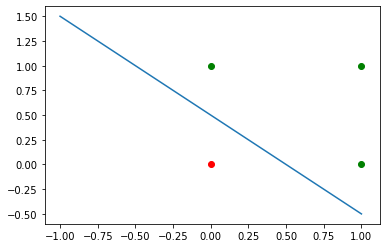

In [2]:
# Code here. Use additional text cells if required.
#Logistic regression
def OR(x1,x2):
    W = [1,1]
    b = -0.5
    x = np.array((x1,x2))
    h = ((1/(1+np.exp(-(np.dot(W,x.T)+b))))>0.5)*1
    return h

#Decision boundary
X = np.array([[0,0,1,1],[0,1,0,1]]).T
y_pred = np.array([OR(X[i,0],X[i,1]) for i in range(len(X))])

#plotting line
x1 = np.linspace(-1,1,100)
y = -x1+0.5

#Plotting points
plt.plot(x1,y)
plt.scatter(X[(y_pred==0),0],X[(y_pred==0),1],color='red')
plt.scatter(X[(y_pred==1),0],X[(y_pred==1),1],color='green')
plt.show()

## Single-Layer Perceptron
---

 The following image represents the architecture of a single-layer perceptron.

![single-layer-perceptron](https://www.simplilearn.com/ice9/free_resources_article_thumb/general-diagram-of-perceptron-for-supervised-learning.jpg)

### 2) Now implement OR gate using a single-layer perceptron with step-function as activation. Specify one set of weights $w_1, w_2$ and bias $b$ that will perform this task. Plot the data points and the decision boundary, mention which class each decision region represents.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`.

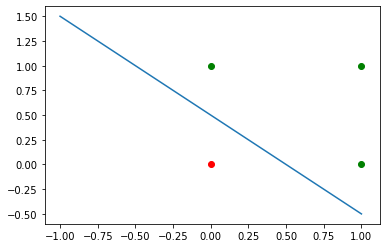

In [3]:
# Code here. Use additional text cells if required.
X = np.array([[0,0,1,1],[0,1,0,1]]).T
Y = np.array([0,1,1,1])


W = np.array([1,1])
b = -0.5
z = np.dot(X,W.T)+b*np.ones(len(X))
#Step activation function
y_pred = (z>0)*1

#plotting line
x1 = np.linspace(-1,1,100)
y = -x1+0.5

#Plotting points
plt.plot(x1,y)
plt.scatter(X[(y_pred==0),0],X[(y_pred==0),1],color='red')
plt.scatter(X[(y_pred==1),0],X[(y_pred==1),1],color='green')
plt.show()

### 3) Do you observe any similarities between logistic regression and single-layer perceptron? What activation function should be used in the perceptron to get the same functionality as logistic regression?

### 4) Now implement AND gate using a single-layer perceptron with step-function as activation. Specify one set of weights $w_1, w_2$ and bias $b$ that will perform this task. Plot the data points and the decision boundary, mention which class each decision region represents.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`.

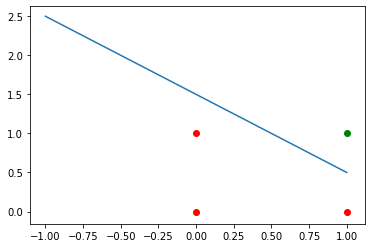

In [4]:
# Code here. Use additional text cells if required.
X = np.array([[0,0,1,1],[0,1,0,1]]).T
Y = np.array([0,1,1,1])


W = np.array([1,1])
b = -1.5
z = np.dot(X,W.T)+b*np.ones(len(X))
#Step activation function
y_pred = (z>0)*1

#plotting line
x1 = np.linspace(-1,1,100)
y = -x1+1.5

#Plotting points
plt.plot(x1,y)
plt.scatter(X[(y_pred==0),0],X[(y_pred==0),1],color='red')
plt.scatter(X[(y_pred==1),0],X[(y_pred==1),1],color='green')
plt.show()

The region where red point lies consist of False region. And to the opposite consist of True region

### 5) Can you construct an XOR gate similarly using a single-layer perceptron? Explain your answer.

No because single layer perceptron is linear in nature and XOR is non linearly seperable.Hence we cant construct

## Multi-Layer Perceptron

---

The following image represents the architecture of a multi-layer perceptron with a singe hidden layer.
![alt text](https://missinglink.ai/wp-content/uploads/2018/11/multilayer-perceptron.png)
<br> Similarly we can introduce multiple hidden layers of different sizes to form a neural network.

### 6) Now implement XOR gate using a multi-layer perceptron with one hidden layer of two neurons and step function as activation, such that $\hat{y} = XOR(x_1, x_2)$ where $x_1$ and $x_2$ are boolean inputs to the gate and $\hat{y}$ is the boolean output from the gate.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`. <br> <br> Plot and visualize the decision boundary for each neuron in the network (with respect to the inputs $x_1$ and $x_2$, in the same plot) and specify which class each region represents. <br> <br> Hint: Decompose the XOR gate into basic gates of OR, AND and NOT and manually define weights accordingly. (refer to the link provided in the reading material) 

[0 1 1 0]


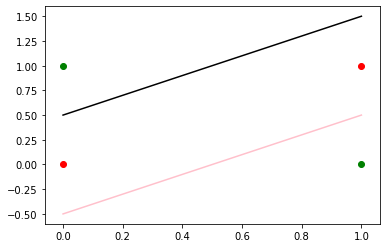

In [5]:
# Code here. Use additional text cells if required.
X = np.array([[0,0,1,1],[0,1,0,1]]).T
Y = np.array([0,1,1,0])

def MLP(X):
    W1 = np.array([[1,-1],[-1,1]])
    b1 = np.array([-0.5,-0.5])
    z1 = np.dot(X,W1.T)+np.multiply(np.ones((len(X),2)),b1)
    #Step activation function
    y_pred = (z1>0)*1
    #Second layer
    W2 = np.array([1,1])
    b2 = -0.5
    z = np.dot(y_pred,W2.T)+b2*np.ones(len(X))
    #Step activation function
    y_pred = (z>0)*1
    return(y_pred)
#XOR results
print(MLP(X))

#plotting line
#Hidden layer 1
x1 = np.linspace(0,1,100)
y = x1-0.5
plt.plot(x1,y,color='pink')

#Hidden layer 1
x1 = np.linspace(0,1,100)
y = x1+0.5
plt.plot(x1,y,color='black')

#Plotting points
plt.scatter(X[(Y==0),0],X[(Y==0),1],color='red')
plt.scatter(X[(Y==1),0],X[(Y==1),1],color='green')
plt.show()


For the black line(neuron1) , to the up lies True region and down lies false region. For the pink line(neuron2), the up region is False and down region is True. The last neuron is an OR gate due to which we get correct decision regions.

### 7) From what you observed in the above exercises, explain what drawback of single-layer perceptron can be overcome by multi-layer perceptron using hidden layers.

MLP adds non linearity to the decision function. SLP are linear in nature

## MLP Classification on Synthetic Dataset
---

### 8) Load the synthetic dataset from '`synth_data_train.npz`' and `'synth_data_test.npz'` containing train and test data. Visualize the data in a 2D plot. <br> Note: `mglearn.discrete_scatter(x1, x2, y)` from `mglearn` library provides good visualization

In [6]:
# Code here. Use additional text cells if required.
#Train
train = np.load('./synth_data_train.npz')
X_train = train['X']
y_train = train['y']
#test
test = np.load('./synth_data_test.npz')
X_test = test['X']
y_test = test['y']

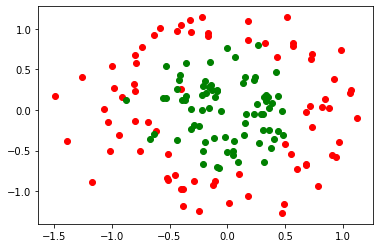

In [7]:
#Plotting points
plt.scatter(X_train[(y_train==0),0],X_train[(y_train==0),1],color='red')
plt.scatter(X_train[(y_train==1),0],X_train[(y_train==1),1],color='green')
plt.show()

### 9) Using `MLPClassifier` from `scikit-learn` library, fit a binary classifier to the given data. Use `max_iter=1000`, `random_state=0` and the rest as default parameters for the classifier.

### Visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier (in the same plot). <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### Report the train and test score of the above classifier on the given train and test data.

In [8]:
from sklearn.neural_network import MLPClassifier
import mglearn
model = MLPClassifier(random_state=0,max_iter=1000).fit(X_train,y_train)


/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
from sklearn.metrics import accuracy_score
#accuracy 
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Test acc score:{},Train acc score:{}".format(accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)))

Test acc score:0.8,Train acc score:0.9533333333333334


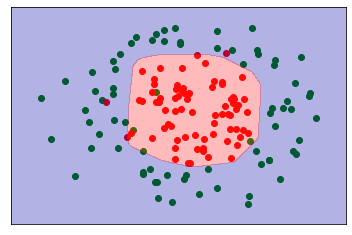

In [10]:
plt.scatter(X_train[(y_train==0),0],X_train[(y_train==0),1],color='green')
plt.scatter(X_train[(y_train==1),0],X_train[(y_train==1),1],color='red')
mglearn.plots.plot_2d_separator(model,X_train,fill=True,alpha=0.3)
plt.show()


### 10) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using a single hidden layer of size <br>(i) 2 (ii) 3 (iii) 5 (iv) 7 (v) 10 (vi) 15. <br>Use `max_iter=3000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

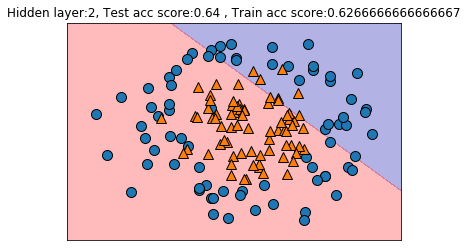

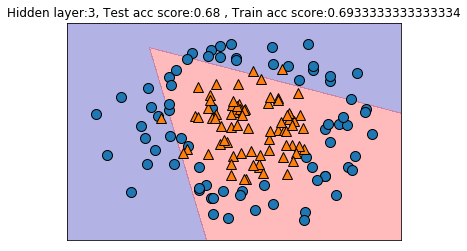

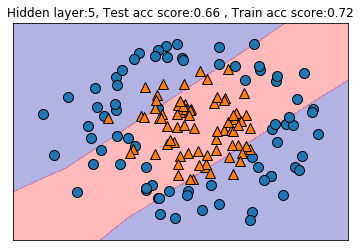

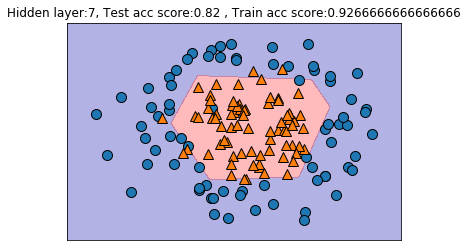

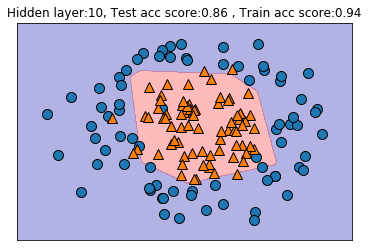

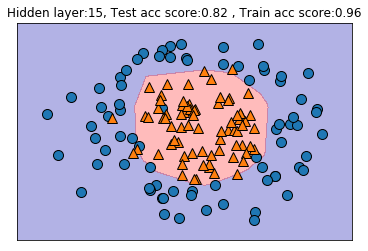

In [11]:
# Code here. Use additional text cells if required.
hidden_size = [2,3,5,7,10,15]
for i in range(6):
    model = MLPClassifier(random_state=0,max_iter=3000,hidden_layer_sizes=hidden_size[i]).fit(X_train,y_train)    
    #accuracy 
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    plt.title("Hidden layer:{}, Test acc score:{} , Train acc score:{}".format(hidden_size[i],accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)))
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
    mglearn.plots.plot_2d_separator(model,X_train,fill=True,alpha=0.3)
    plt.show()

### 11) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using <br>(a) one hidden layer of size 15 <br>(b) two hidden layers each of size 5 <br>(c) three hidden layers each of size 5. <br>Use `max_iter=2000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

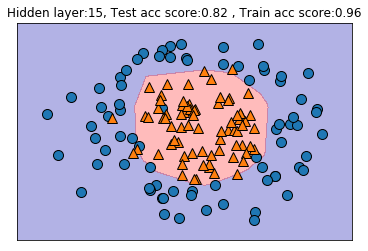

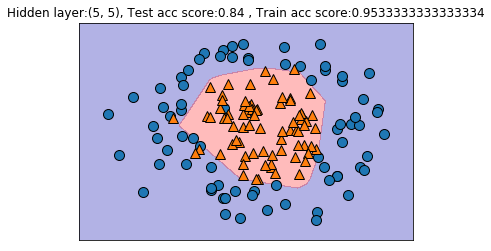

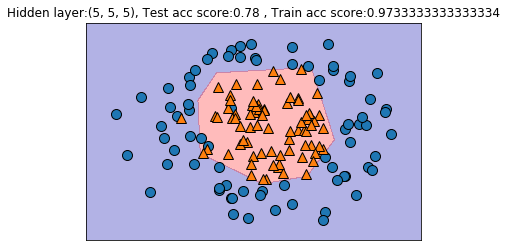

In [12]:
# Code here. Use additional text cells if required.
hidden_size = [15,(5,5),(5,5,5)]
for i in range(3):
    model = MLPClassifier(random_state=0,max_iter=3000,hidden_layer_sizes=hidden_size[i]).fit(X_train,y_train)    
    #accuracy 
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    plt.title("Hidden layer:{}, Test acc score:{} , Train acc score:{}".format(hidden_size[i],accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)))
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
    mglearn.plots.plot_2d_separator(model,X_train,fill=True,alpha=0.3)
    plt.show()

### 12) From your observations in the above exercises, what is the effect of adding more hidden layers and how is it different from adding more neurons to the same hidden layer?

Adding more hidden layers increases the non linearity exponentially. Adding more neurons in the same layer does not increase its prediction power by much in comparison to adding extra hidden layers

### Activation Functions<br>
The following image shows some basic and commonly used activation functions.
![alt text](https://www.kdnuggets.com/wp-content/uploads/activation.png)

### 13) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using one hidden layer of size 10 and activation function as <br>(a) identity <br>(b) sigmoid <br>(c) tanh <br>(d) relu. <br>Use `max_iter=2000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

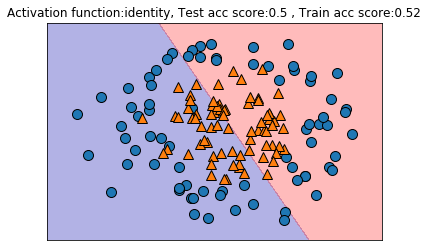

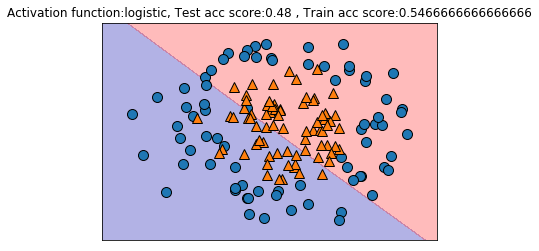

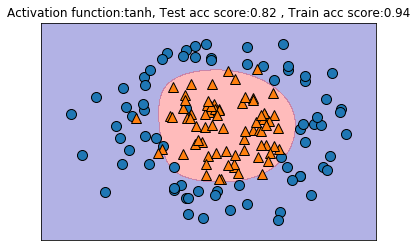

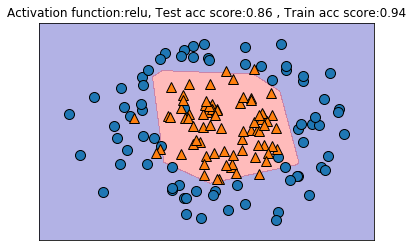

In [13]:
# Code here. Use additional text cells if required.
activation_list = ['identity','logistic','tanh','relu']
for i in range(4):
    model = MLPClassifier(random_state=0,max_iter=2000,hidden_layer_sizes=10,activation=activation_list[i]).fit(X_train,y_train)    
    #accuracy 
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    plt.title("Activation function:{}, Test acc score:{} , Train acc score:{}".format(activation_list[i],accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)))
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
    mglearn.plots.plot_2d_separator(model,X_train,fill=True,alpha=0.3)
    plt.show()

### 14) Which activation function gives the best classifier for the given dataset and why? Are there any drawbacks in using the other activation functions?

ReLU gives the best activation function over other classifiers for the given dataset. This is because its gradient doesnt saturate unlike tanh and sigmoid. It also has sufficent non linearity unlike identity.


## MLP Classification on MNIST Dataset
---

### 15) Load the MNIST dataset from `sklearn.datasets.fetch_openml`. Visualize the data.

In [14]:
# Code here. Use additional text cells if required.
from sklearn import datasets
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True) 
X = data[0]
Y = data[1]


<Figure size 432x288 with 0 Axes>

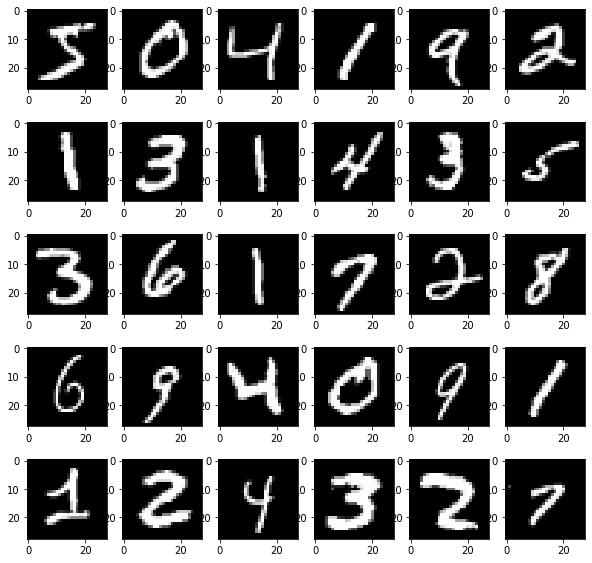

In [15]:
#Visualizing images
plt.gray()
fig = plt.figure(figsize = [10,10])
for i in range(30):
    plt.subplot(5,6,i+1)
    img=np.reshape(X[i],(28,28))
    plt.imshow(img) 

### 16) Fit an `MLPClassifier` with one hidden layer of 50 neurons (use `max_iter=20`, `alpha=1e-4`, `solver='sgd'`, `tol=1e-4`, `random_state=1`) <br> Visualize the weights of the hidden layer. <br>Hint: For each neuron in the hidden layer, reshape the weights to form a 28x28 grid and visualize them.

In [16]:
# Code here. Use additional text cells if required.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=11)
#Normalizing the X
sd=StandardScaler().fit(X_train)
X_std_train = sd.transform(X_train)
X_std_test = sd.transform(X_test)

In [17]:
model = MLPClassifier(random_state=1,max_iter=40,hidden_layer_sizes=50,tol=1e-4,alpha=1e-4,verbose=20).fit(X_std_train,y_train)    

Iteration 1, loss = 0.42810104
Iteration 2, loss = 0.18162627
Iteration 3, loss = 0.13218066
Iteration 4, loss = 0.10635785
Iteration 5, loss = 0.08823627
Iteration 6, loss = 0.07472682
Iteration 7, loss = 0.06430844
Iteration 8, loss = 0.05588022
Iteration 9, loss = 0.04824940
Iteration 10, loss = 0.04209259
Iteration 11, loss = 0.03681007
Iteration 12, loss = 0.03203625
Iteration 13, loss = 0.02781064
Iteration 14, loss = 0.02445472
Iteration 15, loss = 0.02191371
Iteration 16, loss = 0.01890105
Iteration 17, loss = 0.01630124
Iteration 18, loss = 0.01399151
Iteration 19, loss = 0.01235149
Iteration 20, loss = 0.01067904
Iteration 21, loss = 0.00936852
Iteration 22, loss = 0.00827592
Iteration 23, loss = 0.00732313
Iteration 24, loss = 0.00851312
Iteration 25, loss = 0.01080515
Iteration 26, loss = 0.01512700
Iteration 27, loss = 0.00775412
Iteration 28, loss = 0.00528738
Iteration 29, loss = 0.00430109
Iteration 30, loss = 0.00287074
Iteration 31, loss = 0.00243410
Iteration 32, los

/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


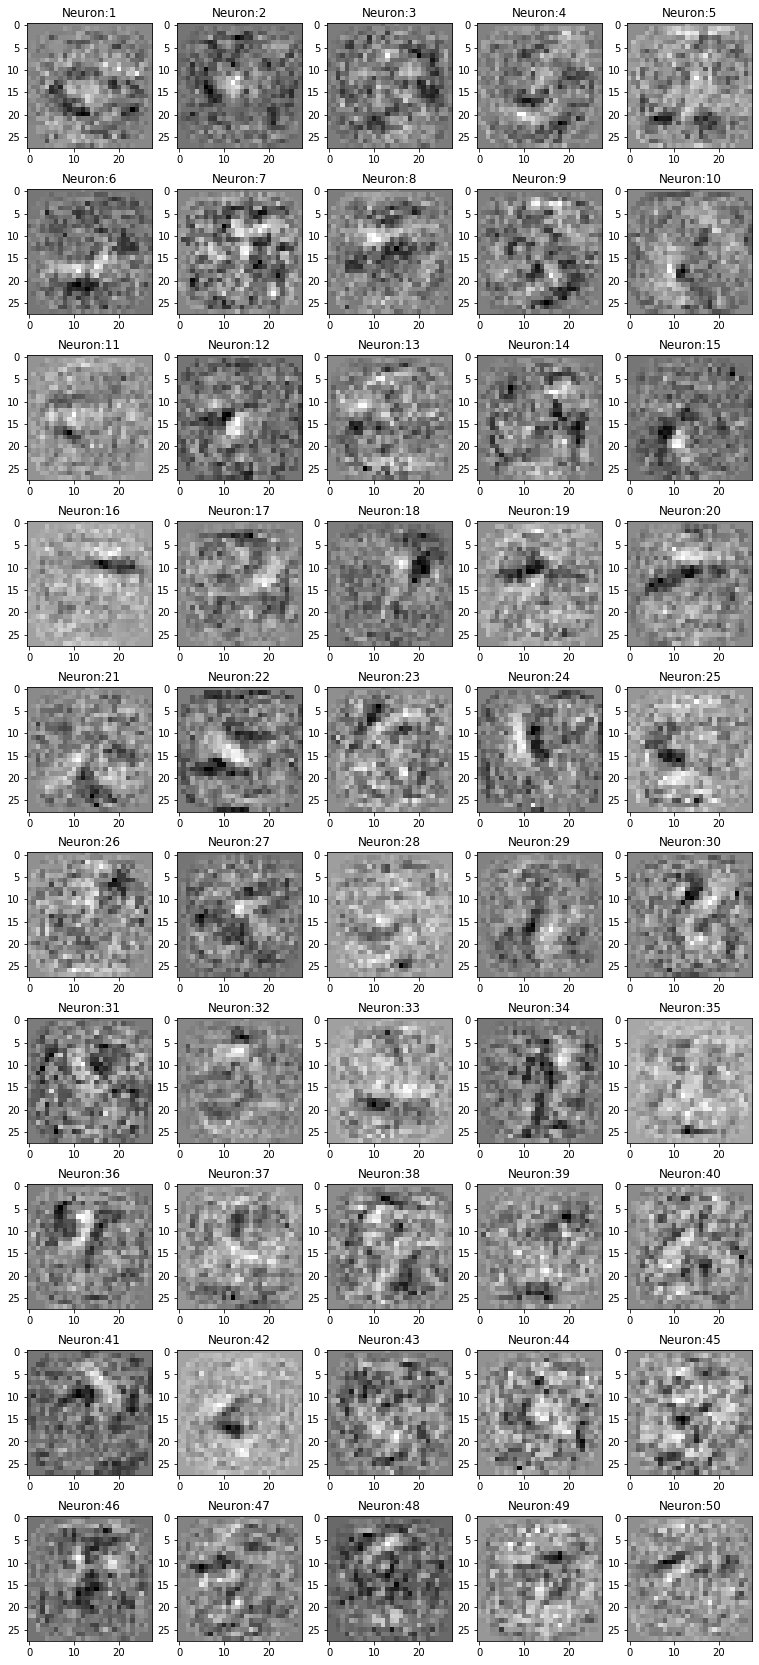

In [18]:
plt.figure(figsize=(13,30))
plt.gray()
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.title("Neuron:{}".format(i+1))
    img = np.reshape(model.coefs_[0][:,i],(28,28))
    plt.imshow(img)

### 17) What patterns do you observe in the weights that you visualized? Explain why you think these patterns are formed?

We can see that each weight is trying to learn different aspect of the image. Although most of the image seems to be noisy we can make out some basic pattern like straight line, curve etc signifying that the neuron gets activated on seeing that image. These patterns are formed due to repeatedly flowing that information throught that neuron

### 18) Experiment with different parameters of the `MLPClassifier`. You can vary the number of hidden layers, number of neurons in each hidden layer and activation function used for the hidden layers. <br> Report the train and test scores and confusion matrix for each of the cases.

In [21]:
# Code here. Use additional text cells if required.
params = [(15,'tanh'),(30,'relu'),((5,5),'logistic'),((10,10),'tanh'),((5,5,5),'relu')]
for p in params:
    model = MLPClassifier(random_state=1,max_iter=40,activation=p[1],hidden_layer_sizes=p[0],tol=1e-4,alpha=1e-4).fit(X_std_train,y_train)
    y_pred_test = model.predict(X_std_test)
    y_pred_train = model.predict(X_std_train)
    print("Activation function:{},Hidden layer size:{}".format(p[1],p[0]))
    print("Test acc score:{} , Train acc score:{}".format(accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)))
    print("Confusion matrix for test:\n{}".format(confusion_matrix(y_test,y_pred_test)))

/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation function:tanh,Hidden layer size:15
Test acc score:0.9235 , Train acc score:0.9713928571428572
Confusion matrix for test:
[[1369    1   16    2    2   13   11    2    8    1]
 [   0 1467    8    4    0    8    3    3   11    1]
 [   8   13 1255   25   16   10   13   14   23    2]
 [   3   11   29 1276    0   40    2   18   33   10]
 [   5    1   16    2 1247    5   10    4    9   46]
 [  21   10    1   38    8 1143   17    8   13   15]
 [   7    4   10    1   19   21 1326    1   13    0]
 [   4    9   15    8   11    7    2 1384    2   34]
 [   8   14   26   29   11   25   14   12 1201   23]
 [  13    3    7   11   53    8    1   30   22 1261]]


/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation function:relu,Hidden layer size:30
Test acc score:0.9557857142857142 , Train acc score:0.9985357142857143
Confusion matrix for test:
[[1388    0    7    1    2    8   12    1    5    1]
 [   0 1483    9    4    0    1    3    0    4    1]
 [   2    5 1335    8    6    2    3   12    5    1]
 [   3    2   19 1334    0   16    2   15   21   10]
 [   3    3   10    1 1282    1    5    6    2   32]
 [   6    2    4   16    2 1204   17    3   12    8]
 [   6    1    3    0    7   12 1362    3    7    1]
 [   2   11   16    2    9    5    1 1418    1   11]
 [   5   13   24   12    5   19    8    3 1253   21]
 [   6    2    3    6   21    8    1   27   13 1322]]


/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation function:logistic,Hidden layer size:(5, 5)
Test acc score:0.8545 , Train acc score:0.8808571428571429
Confusion matrix for test:
[[1289    0   27    4   13   42   30    7    4    9]
 [   0 1403   31   13    0    2    4    8   41    3]
 [  25   30 1179   33   12    9   27   12   39   13]
 [   4   32   44 1163    1   68    4   24   71   11]
 [  20    1   12    2 1165    4   20   13   19   89]
 [  22    9    6   83   30 1017   48    9   30   20]
 [  18    1   17    1   14   30 1303    1   16    1]
 [   5    6   17    9   18    1    0 1273    4  143]
 [   4   28   35   41   51   71   36    4 1050   43]
 [  11    0    3   22   96   15    1  130   10 1121]]


/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation function:tanh,Hidden layer size:(10, 10)
Test acc score:0.9182142857142858 , Train acc score:0.9554464285714286
Confusion matrix for test:
[[1368    0    8    7    2   10   15    7    7    1]
 [   0 1462    8    5    0    4    6    3   16    1]
 [  13    5 1252   37   11    7   18   13   18    5]
 [   6   13   35 1261    0   48    2   20   31    6]
 [   6    3   12    5 1247    4   20    5    6   37]
 [  15    3    6   58   13 1115   27    4   25    8]
 [  12    4   13    4   18   22 1321    0    7    1]
 [  10   16   18   13   19    2    1 1365    9   23]
 [   8   29   16   26    9   33   22    7 1197   16]
 [   8    7    5   14   48    5    2   37   16 1267]]


/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation function:relu,Hidden layer size:(5, 5, 5)
Test acc score:0.8807142857142857 , Train acc score:0.9019821428571428
Confusion matrix for test:
[[1353    0   15    5    4   18    9   12    3    6]
 [   0 1442   18    6    2    2   11    3   20    1]
 [  23   30 1178   60    7    2   27   29   21    2]
 [   1    8   50 1199    4   69    6   19   55   11]
 [  12   10    7    1 1184    3   27    5   17   79]
 [  16    1    3   74   18 1067   31    7   35   22]
 [  15    3   11    0   31   32 1306    0    4    0]
 [   7    6   23   17   13    0    1 1313    6   90]
 [   7   50   19   46   39   49   12    8 1101   32]
 [  11    1    3   17   87    9    0   64   30 1187]]


In [23]:
# Code here. Use additional text cells if required.
p = [(10,10,10),'relu']
model = MLPClassifier(random_state=1,max_iter=40,activation=p[1],hidden_layer_sizes=p[0],tol=1e-4,alpha=1e-4).fit(X_std_train,y_train)
y_pred_test = model.predict(X_std_test)
y_pred_train = model.predict(X_std_train)
print("Activation function:{},Hidden layer size:{}".format(p[1],p[0]))
print("Test acc score:{} , Train acc score:{}".format(accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)))
print("Confusion matrix for test:\n{}".format(confusion_matrix(y_test,y_pred_test)))

/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation function:relu,Hidden layer size:(10, 10, 10)
Test acc score:0.9319285714285714 , Train acc score:0.962125
Confusion matrix for test:
[[1380    0    8    3    1   12    9    0   10    2]
 [   0 1464    9    6    1    3    5    4   12    1]
 [   8    5 1280   24    5   11   10   17   17    2]
 [   1    7   32 1288    0   48    2   15   24    5]
 [   6    1   12    1 1255    8    9    2    4   47]
 [  23    1    8   32   10 1155   19    3   14    9]
 [  17    5   13    0   13   14 1334    1    4    1]
 [   3    7   14    8   14    2    1 1403    2   22]
 [  14   25   25   31    6   30   13   10 1193   16]
 [  12    2    1   11   39    6    1   27   15 1295]]


### 19) Which one of the above do you think is the optimal model? Give reasons. Report the train-test scores and confusion matrix.

The one with 3 hidden layers having 10 neurons each is optimal. This is because of high non linearity giving it power to fit complex models. Train score is 0.962125 , test score: 0.93192. Confusion matrix is shown below.

In [24]:
# Code here. Use additional text cells if required.
print("Confusion matrix for test:\n{}".format(confusion_matrix(y_test,y_pred_test)))

Confusion matrix for test:
[[1380    0    8    3    1   12    9    0   10    2]
 [   0 1464    9    6    1    3    5    4   12    1]
 [   8    5 1280   24    5   11   10   17   17    2]
 [   1    7   32 1288    0   48    2   15   24    5]
 [   6    1   12    1 1255    8    9    2    4   47]
 [  23    1    8   32   10 1155   19    3   14    9]
 [  17    5   13    0   13   14 1334    1    4    1]
 [   3    7   14    8   14    2    1 1403    2   22]
 [  14   25   25   31    6   30   13   10 1193   16]
 [  12    2    1   11   39    6    1   27   15 1295]]
